In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [5]:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings(action="ignore"):
    fxn()

In [6]:
cust_df = pd.read_csv('dataset/customer_data.csv')

# pymt_data = pd.read_csv('dataset/payment_data.csv')

In [7]:
cust_df.shape

(1125, 13)

In [8]:
cust_df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [9]:
# pymt_data.shape

In [10]:
# pymt_data.head()

In [11]:
# cust_df = cust_df.set_index("id")
# pymt_data = pymt_data.set_index("id")

# df = cust_df.join(pymt_data)

In [12]:
# df.shape

In [13]:
# df.head()

In [14]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [15]:
cust_df.describe().round()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.0,1125.0,1125.0,976.0,1125.0,1125.0,1125.0,1125.0,1125.0,1125.0,1125.0,1125.0,1125.0
mean,0.0,57836771.0,5.0,1284.0,2.0,120884.0,2.0,11.0,5.0,101.0,4.0,164618.0,135.0
std,0.0,1817150.0,1.0,52.0,1.0,88445.0,0.0,3.0,3.0,12.0,1.0,152520.0,113.0
min,0.0,54982353.0,1.0,1116.0,1.0,15000.0,1.0,3.0,-1.0,64.0,1.0,60000.0,1.0
25%,0.0,54990497.0,4.0,1244.0,1.0,72000.0,2.0,8.0,5.0,90.0,3.0,60044.0,1.0
50%,0.0,58989748.0,5.0,1282.0,3.0,102000.0,2.0,11.0,5.0,105.0,4.0,72000.0,173.0
75%,0.0,58997994.0,7.0,1314.0,3.0,139000.0,2.0,11.0,5.0,111.0,5.0,151307.0,202.0
max,1.0,59006239.0,7.0,1481.0,3.0,1200000.0,2.0,16.0,10.0,115.0,5.0,650070.0,707.0


In [16]:
# df.drop(["prod_limit", "report_date", "update_date"], axis = 1, inplace = True)

<Axes: xlabel='label', ylabel='count'>

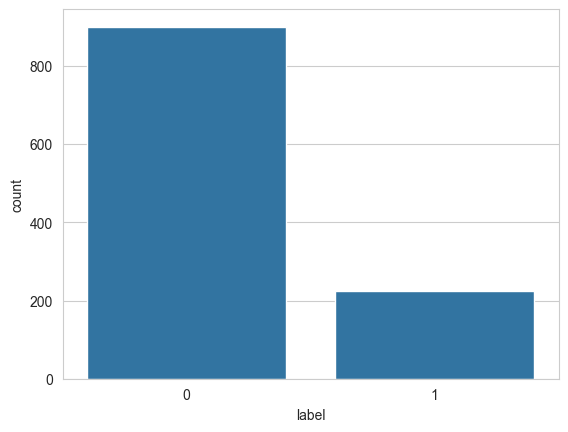

In [17]:
sns.set_style("whitegrid")
sns.countplot(x = "label", data = cust_df)

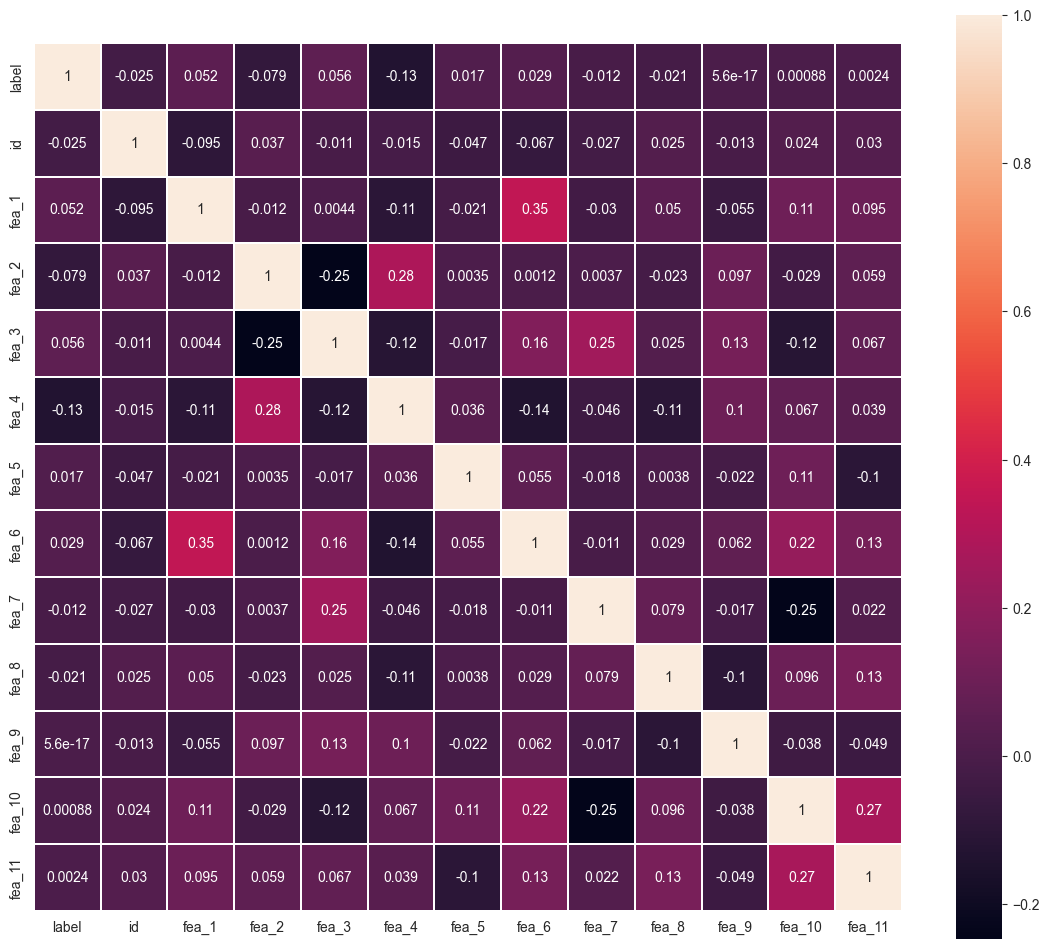

In [18]:
plt.figure(figsize=(14,12))
sns.heatmap(cust_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [19]:
from sklearn.impute import SimpleImputer

imputer =  SimpleImputer(strategy="median")
cust_df= pd.DataFrame(imputer.fit_transform(cust_df), columns = cust_df.columns)

In [20]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   float64
 1   id      1125 non-null   float64
 2   fea_1   1125 non-null   float64
 3   fea_2   1125 non-null   float64
 4   fea_3   1125 non-null   float64
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   float64
 7   fea_6   1125 non-null   float64
 8   fea_7   1125 non-null   float64
 9   fea_8   1125 non-null   float64
 10  fea_9   1125 non-null   float64
 11  fea_10  1125 non-null   float64
 12  fea_11  1125 non-null   float64
dtypes: float64(13)
memory usage: 114.4 KB


In [21]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [22]:
X = cust_df.drop("label",axis=1)
y = cust_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=27)

In [23]:
# y_train.value_counts()

In [24]:
# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [25]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy="minority",random_state=27)
# X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled,y_train)

In [26]:
# y_train_sm.value_counts()

In [27]:
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'penalty': ['l2']
# }

# logreg = LogisticRegression()

# logreg = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
# logreg.fit(X_train_sm, y_train_sm)

# print(f'Best parameters: {logreg.best_params_}')


In [28]:
# y_pred = logreg.predict(X_test_scaled)

# print(classification_report(y_test, y_pred))
# print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred,)}""\n")

In [30]:
from imblearn.over_sampling import SMOTE
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('smote', SMOTE(sampling_strategy="minority", random_state=27)),  
    ('logreg', LogisticRegression())  
])


In [31]:
param_grid = {
    'logreg__C': [0.1, 1, 10, 100],
    'logreg__penalty': ['l2']  
}

In [32]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'logreg__C': 10, 'logreg__penalty': 'l2'}


In [33]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")

              precision    recall  f1-score   support

         0.0       0.83      0.55      0.66       174
         1.0       0.29      0.63      0.40        51

    accuracy                           0.57       225
   macro avg       0.56      0.59      0.53       225
weighted avg       0.71      0.57      0.60       225

Confusion Matrix:
 [[96 78]
 [19 32]]



In [34]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve,auc,roc_auc_score

from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc, accuracy_score, 
    precision_score, recall_score, f1_score, roc_auc_score, log_loss, 
    matthews_corrcoef, cohen_kappa_score
)

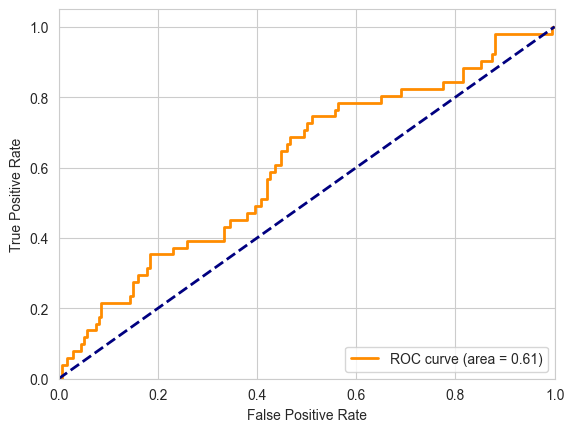

In [37]:
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

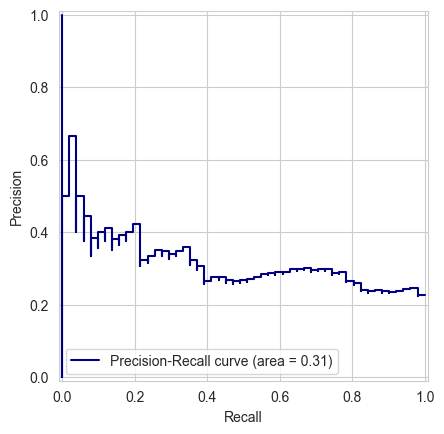

In [55]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(y_test, y_pred_prob, pos_label=grid_search.classes_[1])
pr_auc = auc(recall, prec)
pr_curve = PrecisionRecallDisplay(precision=prec, recall=recall).plot(label=f'Precision-Recall curve (area = {pr_auc:.2f})', color='navy')